Kendra Singh
CUSP Spring Hackathon - MOPAC data 

###  Data Cleaning

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)

In [2]:
# Read in Data
df = pd.read_excel('Well_Being_by_LA.xlsx', header=2)
df.head()

,Geography,Geography code,Measures of Well-being,Estimate,2016-17,Data Marking (2016-17),Lower limit (2016-17),Upper limit (2016-17),2017-18,Data Marking (2017-18),Lower limit (2017-18),Upper limit (2017-18),2018-19,Data Marking (2018-19),Lower limit (2018-19),Upper limit (2018-19)
0,Barking and Dagenham,E09000002,Anxiety,Average (mean),3.02,NaN,2.71,3.34,2.85,NaN,2.49,3.20,2.82,NaN,2.49,3.14
1,Barking and Dagenham,E09000002,Anxiety,Fair,18.47,NaN,14.22,22.71,18.23,NaN,13.77,22.69,14.51,NaN,10.37,18.66
2,Barking and Dagenham,E09000002,Anxiety,Good,22.65,NaN,18.19,27.11,23.15,NaN,18.25,28.05,24.10,NaN,18.69,29.50
3,Barking and Dagenham,E09000002,Anxiety,Poor,20.42,NaN,16.13,24.72,17.58,NaN,13.04,22.13,20.07,NaN,15.23,24.91
4,Barking and Dagenham,E09000002,Anxiety,Very good,38.46,NaN,33.07,43.85,41.04,NaN,35.23,46.84,41.32,NaN,35.54,47.10


In [3]:
#Filter and Clean Data

#Filter to Averages
df = df[df['Estimate'].str.contains("mean", na= False)]

#Get rid of NA columns and only keep 2018-2019
cols = np.r_[3:12, 14:16]
df_after_dropping = df.drop(df.columns[cols],axis=1)
df_after_dropping.head()

,Geography,Geography code,Measures of Well-being,2018-19,Data Marking (2018-19)
0,Barking and Dagenham,E09000002,Anxiety,2.82,NaN
5,Barking and Dagenham,E09000002,Happiness,7.67,NaN
10,Barking and Dagenham,E09000002,Life Satisfaction,7.52,NaN
15,Barking and Dagenham,E09000002,Worthwhile,7.88,NaN
20,Barnet,E09000003,Anxiety,3.19,NaN


In [4]:
# Reshape so there is a row for each year and LA
df = df_after_dropping.pivot(index='Geography code', columns='Measures of Well-being', values='2018-19').reset_index().rename_axis('index',axis=1)
df = df.rename(columns={'Geography code': 'LA'})
df.head()

index,LA,Anxiety,Happiness,Life Satisfaction,Worthwhile
0,E09000001,NaN,NaN,NaN,NaN
1,E09000002,2.82,7.67,7.52,7.88
2,E09000003,3.19,7.44,7.55,7.68
3,E09000004,3.21,7.55,7.54,7.83
4,E09000005,2.40,7.84,7.71,7.84


### Assemble larger dataset with inputs and outputs at the ward level

In [5]:
df2 = pd.read_csv('MeanbyMonthWard_OnlyLikert.csv')

df2 = df2[df2.MONTH < 179]

df2['year'] = 0
df2.loc[(df2['MONTH'] > 156) & (df2['MONTH'] <= 165), 'year'] = 2018
df2.loc[(df2['MONTH'] > 165) & (df2['MONTH'] <= 177), 'year'] = 2019
df2.loc[(df2['MONTH'] == 178), 'year'] = 2020

df2 = df2.groupby(['ward', 'year']).mean().reset_index()

df2 = df2[['ward', 'year', 'Q60', 'Q61']]
df2


,ward,year,Q60,Q61
0,E05000026,2018,2.500000,2.333333
1,E05000026,2019,2.698571,2.459127
2,E05000027,2018,2.625000,2.875000
3,E05000027,2019,2.791667,2.977778
4,E05000028,2018,2.722222,2.767361
...,...,...,...,...
1503,E05011487,2019,2.683333,2.693750
1504,E05011488,2018,3.083333,3.092593
1505,E05011488,2019,2.083333,2.250000
1506,E05011489,2018,2.714286,2.392857


In [6]:
# add Local authority codes
ward_to_LA = pd.read_csv('Ward_to_Local_Authority_District__December_2018__Lookup_in_the_United_Kingdom.csv')
ward_to_LA = ward_to_LA.rename(columns={'LAD18CD': 'LA', 'WD18CD': 'ward'})
ward_to_LA = ward_to_LA[['ward','LA']]

ward_to_LA.head()

,ward,LA
0,E05008942,E06000001
1,E05008943,E06000001
2,E05008944,E06000001
3,E05008945,E06000001
4,E05008946,E06000001


In [7]:
#load additional datasets

#total number of offenses
tnodf = pd.read_csv('YOY_TNOoffs_wards_Incomplete(Some_#NAs).csv')
tnodf = tnodf.rename(columns={'Ward Code': 'ward'})

# deprivation index
dep_idx = pd.read_csv('Full Scores and population.csv')
dep_idx = dep_idx.rename(columns={'Local Authority District code (2019)': 'LA'})
dep_idx.head()


,LA,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E09000001,6.208,0.007,0.010,0.024,-1.654,-2.012,29.472,31.873,0.006,0.012,-2.107,0.032,-0.430,3.587,0.006,1.503,175,656,465,715
1,E09000001,5.143,0.034,0.027,0.063,-1.115,-2.343,24.412,23.084,0.037,0.030,-1.907,0.034,-1.060,3.231,-0.410,1.196,182,580,394,620
2,E09000001,19.402,0.086,0.086,5.804,-0.102,-1.032,40.103,40.535,0.052,0.128,-0.292,0.142,-0.691,5.173,-0.054,2.207,146,759,445,804
3,E09000001,28.652,0.211,0.136,22.260,-0.121,-1.317,39.900,28.979,0.209,0.322,0.338,0.321,-1.167,5.361,-0.604,1.769,229,692,200,683
4,E09000002,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969,522,1297,221,1285


In [8]:
# merge on ward

result = df2.merge(ward_to_LA, on= 'ward')
df = df.merge(result, on= 'LA')
df = df.merge(tnodf, on= 'ward')
df = df.merge(dep_idx, on= 'LA')
df.head()

,LA,Anxiety,Happiness,Life Satisfaction,Worthwhile,ward,year,Q60,Q61,Wards,2018 TNO OFFs,2019 TNO OFFs,2020 TNOOffs,Average of Ward pop 2018,Average of Ward pop 2019,Average of Ward pop 2020,TNO/Pop 2018,TNO/Pop 2019,TNO/Pop 2020,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners)
0,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.5,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.12865,0.138946,0.011406,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969,522,1297,221,1285
1,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.5,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.12865,0.138946,0.011406,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995,0.253,0.371,-0.133,0.251,-0.951,6.897,-0.280,1.324,572,1424,105,1404
2,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.5,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.12865,0.138946,0.011406,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,0.298,0.468,0.129,0.384,-0.498,5.736,-0.587,1.840,534,961,71,940
3,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.5,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.12865,0.138946,0.011406,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601,0.194,0.383,0.101,0.277,-1.424,6.643,-0.107,1.370,356,1190,229,1217
4,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.5,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.12865,0.138946,0.011406,32.437,0.169,0.073,11.762,-0.002,1.214,50.580,47.932,0.220,0.519,0.022,0.228,-1.162,7.211,0.931,1.271,837,2213,145,2234


In [9]:
df['is_18'] = np.where(df['year']==2018, 1, 0)
df['is_19'] = np.where(df['year']==2019, 1, 0)
df['AvgWardPopulation'] = (df['Average of Ward pop 2018'] * df['is_18']) + (df['Average of Ward pop 2019'] * df['is_19'])

df['TNO OFFs'] = (df['2018 TNO OFFs'] * df['is_18']) + (df['2019 TNO OFFs'] * df['is_19'])


df

,LA,Anxiety,Happiness,Life Satisfaction,Worthwhile,ward,year,Q60,Q61,Wards,2018 TNO OFFs,2019 TNO OFFs,2020 TNOOffs,Average of Ward pop 2018,Average of Ward pop 2019,Average of Ward pop 2020,TNO/Pop 2018,TNO/Pop 2019,TNO/Pop 2020,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),is_18,is_19,AvgWardPopulation,TNO OFFs
0,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.50000,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.128650,0.138946,0.011406,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969,522,1297,221,1285,1,0,26094.0,3357.0
1,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.50000,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.128650,0.138946,0.011406,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995,0.253,0.371,-0.133,0.251,-0.951,6.897,-0.280,1.324,572,1424,105,1404,1,0,26094.0,3357.0
2,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.50000,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.128650,0.138946,0.011406,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,0.298,0.468,0.129,0.384,-0.498,5.736,-0.587,1.840,534,961,71,940,1,0,26094.0,3357.0
3,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.50000,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.128650,0.138946,0.011406,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601,0.194,0.383,0.101,0.277,-1.424,6.643,-0.107,1.370,356,1190,229,1217,1,0,26094.0,3357.0
4,E09000002,2.82,7.67,7.52,7.88,E05000026,2018,2.50000,2.333333,Abbey,3357.0,3664.0,310.0,26094.0,26370.0,27179.0,0.128650,0.138946,0.011406,32.437,0.169,0.073,11.762,-0.002,1.214,50.580,47.932,0.220,0.519,0.022,0.228,-1.162,7.211,0.931,1.271,837,2213,145,2234,1,0,26094.0,3357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216119,E09000033,3.36,7.38,7.66,7.75,E05000649,2019,2.34127,2.341270,West End,19725.0,25840.0,2130.0,13343.0,13618.0,13620.0,1.478303,1.897489,0.156388,33.467,0.204,0.151,12.981,-0.227,1.363,27.769,45.528,0.246,0.258,-0.590,0.322,-1.949,3.953,0.124,2.698,228,943,175,975,0,1,13618.0,25840.0
216120,E09000033,3.36,7.38,7.66,7.75,E05000649,2019,2.34127,2.341270,West End,19725.0,25840.0,2130.0,13343.0,13618.0,13620.0,1.478303,1.897489,0.156388,40.540,0.313,0.200,19.996,0.388,0.705,25.353,34.149,0.360,0.480,-0.034,0.348,-1.751,3.559,-0.371,2.003,529,1278,379,1269,0,1,13618.0,25840.0
216121,E09000033,3.36,7.38,7.66,7.75,E05000649,2019,2.34127,2.341270,West End,19725.0,25840.0,2130.0,13343.0,13618.0,13620.0,1.478303,1.897489,0.156388,14.013,0.077,0.059,5.118,-0.274,0.136,25.424,34.478,0.122,0.180,-0.327,0.102,-1.243,3.489,-0.424,2.064,144,909,109,914,0,1,13618.0,25840.0
216122,E09000033,3.36,7.38,7.66,7.75,E05000649,2019,2.34127,2.341270,West End,19725.0,25840.0,2130.0,13343.0,13618.0,13620.0,1.478303,1.897489,0.156388,22.192,0.125,0.096,1.674,-0.480,1.095,23.500,43.709,0.100,0.241,-1.006,0.122,-1.126,3.089,0.161,2.203,198,843,200,866,0,1,13618.0,25840.0


### Decision Tree Regression

Determining optimal tree depth

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import SimpleImputer


In [11]:
# your code here
cols = ['Q60']  + [col for col in df if col != 'Q60']
df = df[cols]
df = df.drop(columns=['is_18','is_19','Wards','TNO/Pop 2018', 'TNO/Pop 2019', 'TNO/Pop 2020', 'Average of Ward pop 2020','Average of Ward pop 2019','Average of Ward pop 2018', '2020 TNOOffs', 'ward'])

In [12]:
df = pd.get_dummies(df, columns=['LA', 'year'])

In [13]:
df

,Q60,Anxiety,Happiness,Life Satisfaction,Worthwhile,Q61,2018 TNO OFFs,2019 TNO OFFs,Index of Multiple Deprivation (IMD) Score,Income Score (rate),Employment Score (rate),"Education, Skills and Training Score",Health Deprivation and Disability Score,Crime Score,Barriers to Housing and Services Score,Living Environment Score,Income Deprivation Affecting Children Index (IDACI) Score (rate),Income Deprivation Affecting Older People (IDAOPI) Score (rate),Children and Young People Sub-domain Score,Adult Skills Sub-domain Score,Geographical Barriers Sub-domain Score,Wider Barriers Sub-domain Score,Indoors Sub-domain Score,Outdoors Sub-domain Score,Dependent Children aged 0-15: mid 2015 (excluding prisoners),Population aged 16-59: mid 2015 (excluding prisoners),Older population aged 60 and over: mid 2015 (excluding prisoners),Working age population 18-59/64: for use with Employment Deprivation Domain (excluding prisoners),AvgWardPopulation,TNO OFFs,LA_E09000002,LA_E09000003,LA_E09000004,LA_E09000005,LA_E09000006,LA_E09000007,LA_E09000008,LA_E09000009,LA_E09000010,LA_E09000011,LA_E09000012,LA_E09000013,LA_E09000014,LA_E09000015,LA_E09000016,LA_E09000017,LA_E09000018,LA_E09000019,LA_E09000020,LA_E09000021,LA_E09000022,LA_E09000023,LA_E09000024,LA_E09000025,LA_E09000026,LA_E09000027,LA_E09000028,LA_E09000029,LA_E09000030,LA_E09000031,LA_E09000032,LA_E09000033,year_2018,year_2019,year_2020
0,2.50000,2.82,7.67,7.52,7.88,2.333333,3357.0,3664.0,19.837,0.117,0.059,14.798,-0.359,-0.147,45.171,26.888,0.155,0.162,-0.366,0.325,-0.400,5.590,0.110,0.969,522,1297,221,1285,26094.0,3357.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,2.50000,2.82,7.67,7.52,7.88,2.333333,3357.0,3664.0,31.576,0.207,0.107,11.385,-0.027,0.846,50.420,25.995,0.253,0.371,-0.133,0.251,-0.951,6.897,-0.280,1.324,572,1424,105,1404,26094.0,3357.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,2.50000,2.82,7.67,7.52,7.88,2.333333,3357.0,3664.0,37.596,0.265,0.151,25.506,0.250,0.353,45.413,30.233,0.298,0.468,0.129,0.384,-0.498,5.736,-0.587,1.840,534,961,71,940,26094.0,3357.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2.50000,2.82,7.67,7.52,7.88,2.333333,3357.0,3664.0,32.844,0.187,0.109,15.713,0.454,0.895,48.119,28.601,0.194,0.383,0.101,0.277,-1.424,6.643,-0.107,1.370,356,1190,229,1217,26094.0,3357.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,2.50000,2.82,7.67,7.52,7.88,2.333333,3357.0,3664.0,32.437,0.169,0.073,11.762,-0.002,1.214,50.580,47.932,0.220,0.519,0.022,0.228,-1.162,7.211,0.931,1.271,837,2213,145,2234,26094.0,3357.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216119,2.34127,3.36,7.38,7.66,7.75,2.341270,19725.0,25840.0,33.467,0.204,0.151,12.981,-0.227,1.363,27.769,45.528,0.246,0.258,-0.590,0.322,-1.949,3.953,0.124,2.698,228,943,175,975,13618.0,25840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
216120,2.34127,3.36,7.38,7.66,7.75,2.341270,19725.0,25840.0,40.540,0.313,0.200,19.996,0.388,0.705,25.353,34.149,0.360,0.480,-0.034,0.348,-1.751,3.559,-0.371,2.003,529,1278,379,1269,13618.0,25840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
216121,2.34127,3.36,7.38,7.66,7.75,2.341270,19725.0,25840.0,14.013,0.077,0.059,5.118,-0.274,0.136,25.424,34.478,0.122,0.180,-0.327,0.102,-1.243,3.489,-0.424,2.064,144,909,109,914,13618.0,25840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0
216122,2.34127,3.36,7.38,7.66,7.75,2.341270,19725.0,25840.0,22.192,0.125,0.096,1.674,-0.480,1.095,23.500,43.709,0.100,0.241,-1.006,0.122,-1.126,3.089,0.161,2.203,198,843,200,866,13618.0,25840.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [14]:
OS=[]
X = df.iloc[:,1:64]
y = df.iloc[:,0]

#choose a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 11)

# Create our imputer to replace missing values with the mean e.g.
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp = imp.fit(X_train)
imp1 = imp.fit(X_test)

# Impute our data, then train
X_train_imp = imp.transform(X_train)
X_test_imp = imp.transform(X_test)


for i in range(1,25):
    
    # learn model
    dt=DecisionTreeRegressor(max_depth=i)
    dt.fit(X_train_imp,y_train)
    
    # out of sample accuracy
    OS.append(dt.score(X_test_imp,y_test))
    print('For max_depth',i,'Out of sample accuracy:',dt.score(X_test_imp,y_test))
    

For max_depth 1 Out of sample accuracy: 0.22692105406064889
For max_depth 2 Out of sample accuracy: 0.3443634842408109
For max_depth 3 Out of sample accuracy: 0.4156938902568429
For max_depth 4 Out of sample accuracy: 0.4803231617305058
For max_depth 5 Out of sample accuracy: 0.530022535323647
For max_depth 6 Out of sample accuracy: 0.5965872750995691
For max_depth 7 Out of sample accuracy: 0.6536338001309154
For max_depth 8 Out of sample accuracy: 0.7339621737932509
For max_depth 9 Out of sample accuracy: 0.7850553409204211
For max_depth 10 Out of sample accuracy: 0.834714851676285
For max_depth 11 Out of sample accuracy: 0.876822058196461
For max_depth 12 Out of sample accuracy: 0.9143561029654131
For max_depth 13 Out of sample accuracy: 0.9425818707609562
For max_depth 14 Out of sample accuracy: 0.9631987257073508
For max_depth 15 Out of sample accuracy: 0.979853994811146
For max_depth 16 Out of sample accuracy: 0.9886354516563385
For max_depth 17 Out of sample accuracy: 0.995976883

Based on the results listed above, the optimal tree depth is between 7- 13. Want to avoid over-fitting so will tune this hyper parameter.

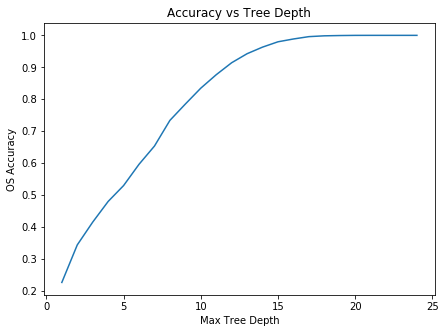

In [16]:
import matplotlib.pylab as plt

#plot OS and max_depth
plt.figure(figsize=(7,5))
plt.plot(range(1,25,1),OS)
plt.xlabel("Max Tree Depth")
plt.ylabel("OS Accuracy")
plt.title("Accuracy vs Tree Depth")
plt.show()

Tune the hyper-parameter selected above by cross-validation using the training data.

In [17]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import r2_score

scoring = make_scorer(r2_score)
g_cv = GridSearchCV(DecisionTreeRegressor(random_state=0),
              param_grid={'min_samples_split': range(2, 10)},
              scoring=scoring, cv=5, refit=True)

g_cv.fit(X_train_imp, y_train)
g_cv.best_params_

result = g_cv.cv_results_


r2_score(y_test, g_cv.best_estimator_.predict(X_test_imp))

0.9999999992610266

In [19]:
print(g_cv.best_params_)

{'min_samples_split': 8}


The optimal tree depth is 8. For further research we can tune other aspects of the decision tree regressor and also create a random forest predictor, and a decision tree regressor on the results that will also yield insight in to the factors that affect public perception of police. We can also easily change and analyse any of the output variables in the data.

The most interesting and distinctly important finding is that the highest predictor of a ward's perception of the local police is most closely correlated with their perception of the London city police and vice versa.

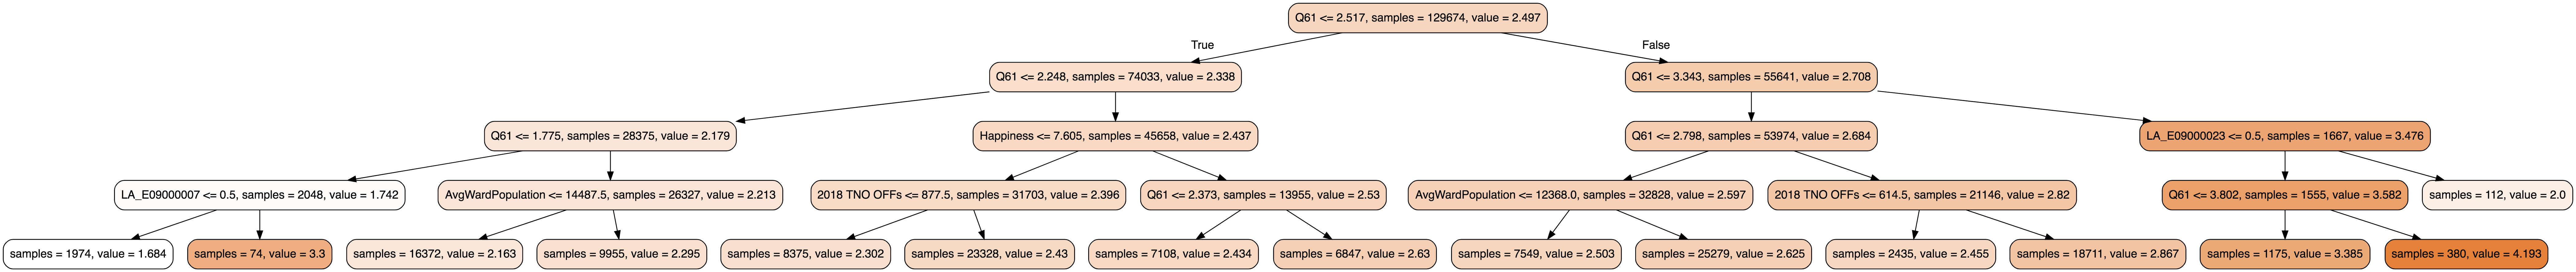

In [23]:
from sklearn import tree

dt=DecisionTreeRegressor(random_state=0, max_depth=4)
dt.fit(X_train_imp,y_train)
thestring=tree.export_graphviz(dt,out_file=None,
                         feature_names=X_train.columns.values,  
                         class_names=dt.classes_,  
                         filled=True, rounded=True,  
                         special_characters=True,impurity=False).replace("<br/>",", ").replace("&le;","<=").replace("=<","=\"").replace(">,","\",")
print(thestring)

digraph Tree {
node [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;
edge [fontname=helvetica] ;
0 [label="Q61 <= 2.517, samples = 129674, value = 2.497", fillcolor="#f7d6bf"] ;
1 [label="Q61 <= 2.248, samples = 74033, value = 2.338", fillcolor="#f8decb"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="Q61 <= 1.775, samples = 28375, value = 2.179", fillcolor="#fae6d8"] ;
1 -> 2 ;
3 [label="LA_E09000007 <= 0.5, samples = 2048, value = 1.742", fillcolor="#fefcfa"] ;
2 -> 3 ;
4 [label="samples = 1974, value = 1.684", fillcolor="#ffffff"] ;
3 -> 4 ;
5 [label="samples = 74, value = 3.3", fillcolor="#eeae7f"] ;
3 -> 5 ;
6 [label="AvgWardPopulation <= 14487.5, samples = 26327, value = 2.213", fillcolor="#fae4d5"] ;
2 -> 6 ;
7 [label="samples = 16372, value = 2.163", fillcolor="#fae7d9"] ;
6 -> 7 ;
8 [label="samples = 9955, value = 2.295", fillcolor="#f9e0cf"] ;
6 -> 8 ;
9 [label="Happiness <= 7.605, samples = 45658, value = 2.437", fillcolor=